The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


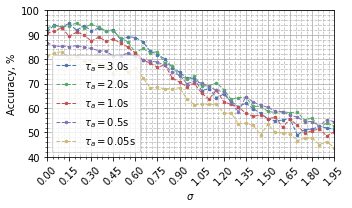

In [19]:
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
plt.rcParams['font.size'] = 8
CB91_Blue = '#2CBDFE'
CB91_Green = '#47DBCD'
CB91_Pink = '#F3A0F2'
CB91_Purple = '#9D2EC5'
CB91_Violet = '#661D98'
CB91_Amber = '#F5B14C'
color_list = reversed([CB91_Blue, CB91_Pink, CB91_Green, CB91_Amber,
              CB91_Purple, CB91_Violet][::2])
#plt.rcParams['axes.prop_cycle'] = plt.cycler(color=color_list)
plt.style.use('seaborn-deep')

load_dirs = [
    '1_3',
    '1_2/',
    '1/',
    '2/',
    '20/',
]

tau_a = [
    
    1/3,
    0.5,
    1.,
    2.,
     20.,
]

r_tau_a = [1/el for el in tau_a]


def parser(line_text: str) -> tuple:
    """
    Function parses text in form:
    ```v_name_1=v1:v_name_2:v2```
    and return (v1, v2)
    :param line_text:
    :return: (v1, v2)
    """
    line_text = line_text.split(":")
    v1 = line_text[0].split("=")[1]
    v2 = line_text[1].split("=")[1]
    return float(v1), float(v2)
%matplotlib inline
from matplotlib.patches import Rectangle
fig, ax = plt.subplots(figsize=(5, 3))
#fig, ax = plt.subplots(figsize=(20, 10), tight_layout=True)
#sns.color_palette('deep')
# with open('accuracy_vs_noise.txt', 'r') as f:
lines = []
max_value = -100
for i, name in enumerate(load_dirs):
    
    x, y = [], []
    with open(
        os.path.join(name, f"accuracy_vs_noise_{float(tau_a[i])}_0.15.txt")
        ,
        "r",
    ) as f:
        line = f.readline()
        while line:
            t_x, t_y = parser(line)
            x.append(t_x)
            y.append(t_y)
            line = f.readline()
    line = plt.plot(x, 
                    y, 
                    '.', 
                    label=fr'$\tau_a=${r_tau_a[i]}s', 
                    linestyle='--', 
                    linewidth=1, 
                    markersize=5)
    lines.append(line)
    max_value = max(max_value, max(y))
#ax.add_patch(Rectangle((0, 0), 40, 30,)
plt.legend(ncol=1)
plt.xlabel('$\sigma$')
plt.ylabel('Accuracy, %')
plt.minorticks_on()
plt.grid()
plt.grid(which='minor', linestyle='--', alpha=.8)
plt.xticks(x[::3], rotation=45)
plt.xlim(x[0], x[-1])
plt.ylim(40, 100)
plt.tight_layout()
plt.savefig('/home/pugavko/Error_vs_noise_from_tau.eps', format='eps')
plt.show()